## More plotting


There are a lot of new projects, some built upon matplotlib, others independent.
A common goal for a lot of these is to allow for interactive data exploration in the web browser. Many use the javascript library `d3.js` to do this.

- **mpld3**: http://mpld3.github.io/ (3D functionalities)
- **Bokeh**: http://bokeh.pydata.org/en/latest/ (browser friendly)
- **plot.ly**: https://plot.ly/ (browser friendly, even too much actually)
- **Glue**: http://www.glueviz.org/en/stable/ (explore relationships amongrelated datasets)
- **D3PO**: http://d3po.org/
- **d3py**: https://github.com/mikedewar/d3py(inactive?)
- **Seaborn**: http://web.stanford.edu/~mwaskom/software/seaborn/(basedon matplotlib)
- **ggplot**: https://github.com/yhat/ggplot/ (for you R users)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Set font sizes using rcParams
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Q2: Planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [2]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [3]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [4]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

In [8]:
colors = ["gray", "yellow", "blue", "red", "orange", "brown", "lightblue", "royalblue", "whitesmoke"]

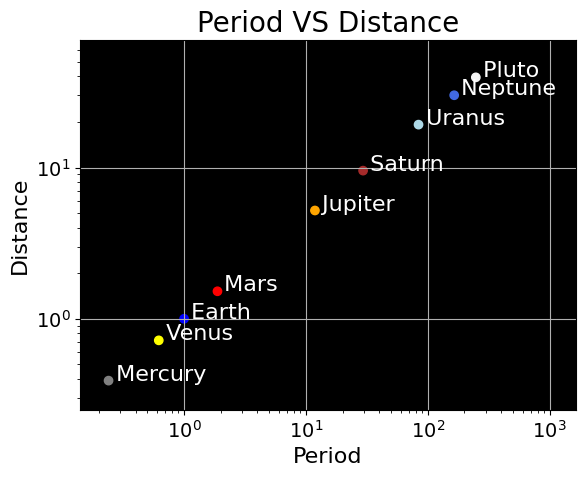

In [41]:
fig, ax = plt.subplots()
ax.scatter(P, a, c=colors)
plt.title("Period VS Distance")
plt.xlabel("Period")
plt.ylabel("Distance")
for pp, aa, name in zip(P, a, names):
    plt.text(pp, aa, "\n\n " + name, color="white")
plt.yscale("log")
plt.xscale("log")
ax.set_facecolor('black')
plt.grid()
plt.xlim(P[0] - 0.1, P[-1] + 1400)
plt.ylim(0.25, a[-1] + 30)
plt.xticks()
plt.yticks()
plt.show()


## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

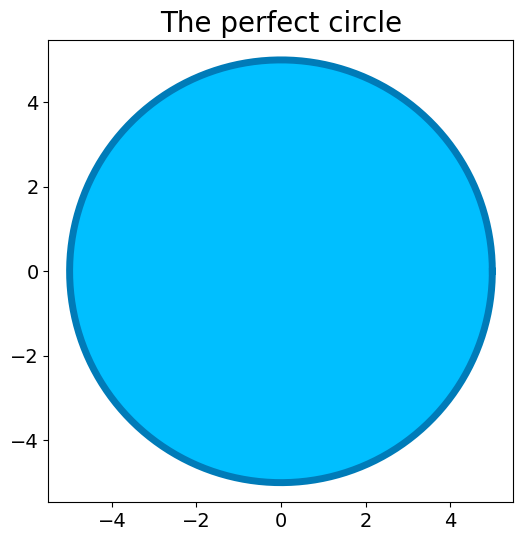

In [44]:
plt.figure(figsize=(6,6))
theta = np.linspace(0, 2*np.pi, 500)
R = 5
x = R * np.cos(theta)
y = R * np.sin(theta)
plt.plot(x,y, c="#007bb8", linewidth=5)
plt.title("The perfect circle")
plt.axis("equal")
plt.fill(x, y, "deepskyblue")
plt.show()


Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

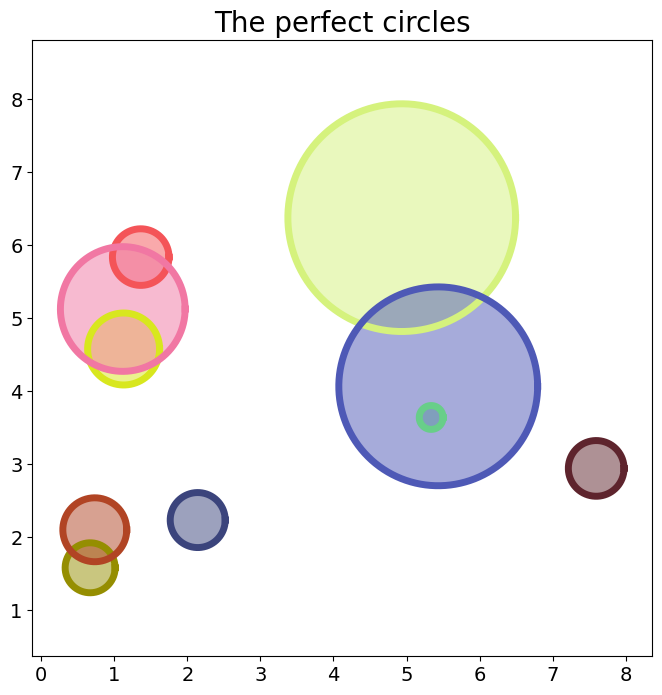

In [62]:
def draw_circle(x0, y0, R, color):
    theta = np.linspace(0, 2*np.pi, 500)
    x = R * np.cos(theta) + x0
    y = R * np.sin(theta) + y0
    plt.plot(x,y, c=color, linewidth=5)
    plt.fill(x, y, c=color, alpha=0.5)

plt.figure(figsize=(8,8))
coords = np.random.rand(10,3)
for c in coords:
    draw_circle(c[0]*8, c[1]*8, c[2]*2, np.random.rand(3,))
plt.title("The perfect circles")
plt.axis("equal")
plt.show()

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


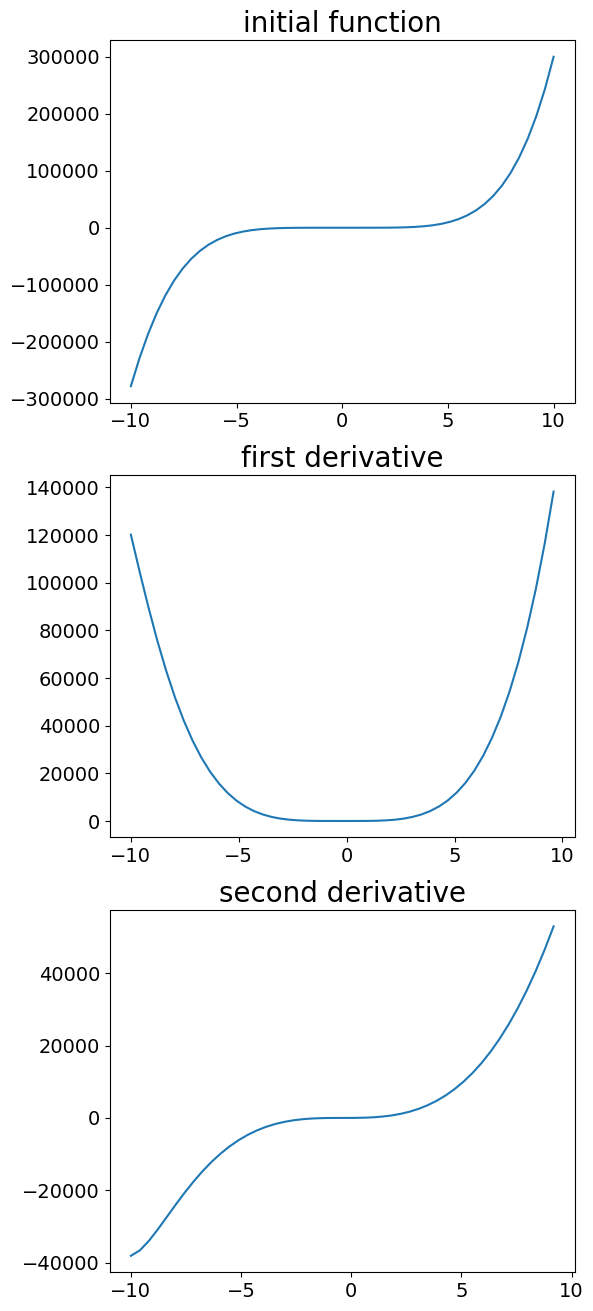

In [63]:
def der(y, delta):
    return (y[1:]-y[:-1])/delta
x = np.linspace(-10,10)
y = 3*x**5-2*x+np.exp(-x)
y_prime = der(y, x[1]-x[0])
y_sec = der(y_prime, x[1]-x[0])

plt.figure(figsize=(6,16))
plt.subplot(311)
plt.plot(x,y)
plt.title("initial function")
plt.subplot(312)
plt.plot(x[:-1],y_prime)
plt.title("first derivative")
plt.subplot(313)
plt.plot(x[:-2],y_sec)
plt.title("second derivative")
plt.show()

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [1]:
f = open("../../lectures/shore_leave.txt", "r")
text = ""
for line in f.readlines():
    text += line.replace("\n", " ").replace(",","").replace(".","").lower()
words = text.split(" ")
unique_words = set(words)
# count = {}
# for uw in unique_words:
#     count[uw] = words.count(uw)
    
# print(count)
c = {uw: words.count(uw) for uw in unique_words}
if "" in c:
    del c['']
c = dict(sorted(c.items(), key=lambda item: -item[1]))
print(c)

{'the': 162, 'a': 133, 'you': 132, 'i': 128, 'is': 105, 'to': 102, 'and': 96, 'it': 82, 'of': 69, 'not': 57, 'captain': 53, 'have': 50, 'are': 48, 'that': 47, 'this': 46, 'he': 44, 'in': 40, 'on': 38, 'what': 37, 'all': 34, 'sulu': 34, 'we': 34, 'mister': 33, 'kirk': 33, 'be': 32, 'do': 32, 'me': 29, 'they': 28, 'my': 27, 'there': 27, 'here': 27, 'mccoy': 26, 'like': 25, 'doctor': 24, 'was': 24, 'will': 24, 'for': 23, 'spock': 23, 'with': 23, 'am': 22, 'but': 21, 'sir': 21, 'no': 21, 'up': 21, 'one': 21, 'down': 20, 'at': 19, 'planet': 19, 'from': 18, 'would': 18, 'yes': 18, 'his': 18, 'out': 18, 'them': 17, 'your': 17, 'our': 17, 'back': 17, 'as': 17, 'an': 17, 'well': 15, 'people': 15, 'can': 15, 'did': 14, 'finnegan': 14, 'where': 14, 'right': 14, 'been': 14, 'jim': 14, 'aye': 14, 'just': 13, 'could': 13, 'her': 13, 'rabbit': 13, 'come': 13, 'know': 13, 'off': 13, 'rocky': 13, 'find': 13, 'has': 12, 'girl': 12, 'got': 12, 'some': 12, 'see': 12, 'outcrop': 12, 'go': 12, 'these': 12, 

#### Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

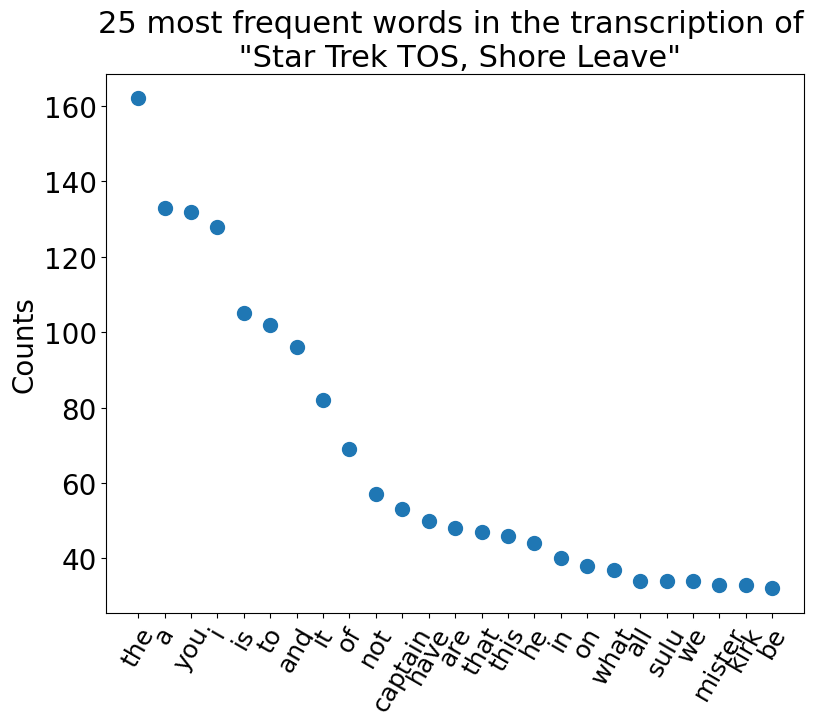

In [4]:
plt.figure(figsize=(9,7))
plt.plot(list(c.keys())[:25], list(c.values())[:25], "o", markersize=10)
plt.xticks(rotation=60, fontsize=18)
plt.yticks(fontsize=20)
plt.title(f"25 most frequent words in the transcription of \n \"Star Trek TOS, Shore Leave\"", fontsize=22)
plt.ylabel("Counts", fontsize=20)
plt.show()

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [5]:
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

In [6]:
c = xv + 1j*yv

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

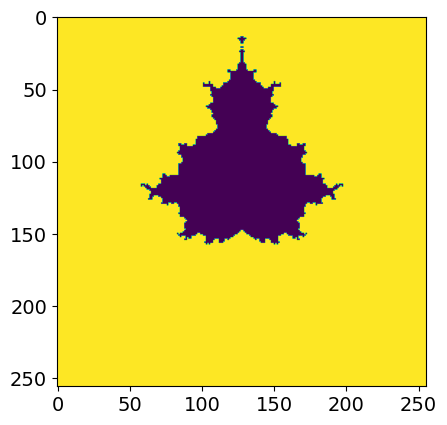

In [7]:
fig, ax = plt.subplots()
ax.imshow(m)

## Q8: Game of Life visualization

If you've implemented Conway's Game of Life from last lecture, make a visualization of your result using matplotlib

--> already producing a `.gif` in `gameOfLife.py` in lecture2

## Q9: Quit smoking

If you ever used ROOT for your scientific plotting, stop now. It's not good for your health.

--> `pyROOT`.